## Canada Unemployment Rate Forecasting

This project attempts to study several approaches to effectively forecast the Canadian unemployment rate. Given that the slight decline in the Canada economy in the recent few years due to COVID and the increase in the interest rate, it is important to study the Canadian labor market before the policy-making decisions.

The goal of this project is to find out some of the best models for forecasting the Canadian unemployment rate. The models studied in this project included:

* Autoregressive Model (AR(2))
* Markov-Switch Autoregressive Model (MSAR(2))
* Machine Learning Method - LASSO Linear Regression (LASSO)

I make use of the data complied by "A Large Canadian Database for Macroeconomic Analysis" by Fortin-Gagnon et al (2015) for the study.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("df.csv")

In [3]:
df

,Date,t,UNEMP_CAN,GDP_new,BSI_new,GPI_new,SPI_new,IP_new,NDM_new,DM_new,...,IPPI_CAN,IPPI_ENER_CAN,IPPI_WOOD_CAN,IPPI_METAL_CAN,IPPI_MOTOR_CAN,IPPI_MACH_CAN,WTISPLC,TSX_HI,TSX_LO,TSX_CLO
0,Feb-97,1,0.0,0.006273,0.007456,0.008982,0.004994,0.010951,0.013410,0.010017,...,0.000000,-0.027536,0.004008,0.000000,0.003284,0.003839,-0.125110,0.018774,0.031989,0.007868
1,Mar-97,2,-0.2,-0.000103,-0.000210,-0.004557,0.002076,-0.006017,-0.014424,-0.006023,...,0.001400,-0.054772,-0.010050,0.004874,0.007621,0.002551,-0.056497,0.013846,-0.042889,-0.051247
2,Apr-97,3,0.1,0.006749,0.008400,0.013052,0.003724,0.013689,0.009079,0.020985,...,0.008357,-0.029934,0.029853,0.000000,0.017205,0.003814,-0.062413,-0.060286,-0.026262,0.021378
3,May-97,4,0.0,0.003541,0.004212,0.003167,0.003745,0.001617,0.002257,0.014521,...,-0.001388,0.005510,-0.017805,0.000000,-0.009641,0.000000,0.054761,0.082580,0.054234,0.065643
4,Jun-97,5,-0.3,0.001903,0.001638,-0.004255,0.004897,-0.008476,-0.000224,-0.012633,...,-0.004175,-0.016621,-0.018127,0.000000,0.000000,0.000000,-0.083048,0.010101,0.067244,0.008677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Mar-23,314,0.0,0.000878,0.000561,0.002631,0.000177,0.005330,0.010996,-0.008463,...,-0.001584,-0.034046,-0.023530,-0.021277,0.008126,0.009438,-0.047307,-0.008552,-0.040916,-0.006017
314,Apr-23,315,0.0,-0.000770,0.000041,-0.000264,-0.000972,0.001206,-0.009389,-0.003116,...,-0.002380,-0.027800,-0.030623,0.002863,-0.004507,0.000000,0.080840,0.005406,0.039496,0.026349
315,May-23,316,0.2,0.001491,0.000228,-0.006402,0.004636,-0.003853,0.020287,0.021763,...,-0.005575,-0.054108,0.006525,0.002855,0.004507,0.006809,-0.104312,-0.003779,-0.029566,-0.052951
316,Jun-23,317,0.2,-0.001976,-0.002904,-0.004428,-0.001007,-0.001679,-0.004924,-0.003095,...,-0.006410,0.017851,-0.008983,-0.009309,-0.004507,-0.006809,-0.018755,-0.022557,-0.007900,0.029355


### 1. Showing that the data is stationary in order to proceed (by plotting & Augmented Dickey-Fuller (ADF) test)

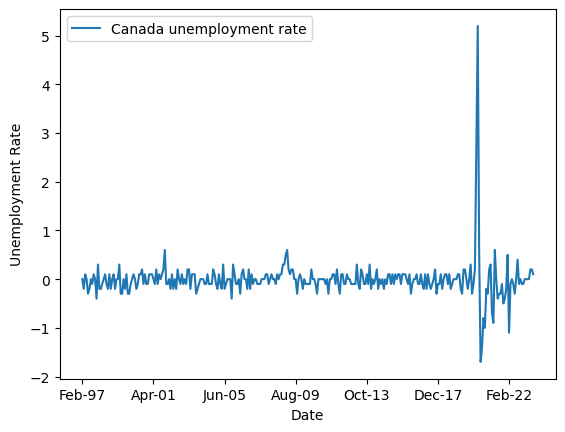

In [4]:
df.plot(x='Date', y='UNEMP_CAN', label='Canada unemployment rate')

# Set the label for the y-axis
plt.ylabel('Unemployment Rate')

# Show the legend with the updated label
plt.legend()

# Show the plot
plt.show()

The data fluctuate the most around the year of 2020, the time when COVID-19 emerged. 

We can also see that the time-series plot also has a mean of zero, showing that it is likely to be stationary. 

We can further confirm this by the Augmented Dickey-Fuller (ADF) test:

In [5]:
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(df['UNEMP_CAN'])

print('p-value: {:.3f}'.format(df_test[1]))

p-value: 0.000


The p-value for the ADF test is zero, suggesting that it can reject the null hypothesis. Therefore, this proves that the data is stationary.

### 2. Finding the baseline model - model diagnosis

In this section, I attempt to find the baseline model (which is a simple AR model) for the comparison with more complicated models. 

I first plotted the ACF & PACF function to look for possible models, then compared their AIC & BIC values to choose AR(2) model as my baseline model for this study.

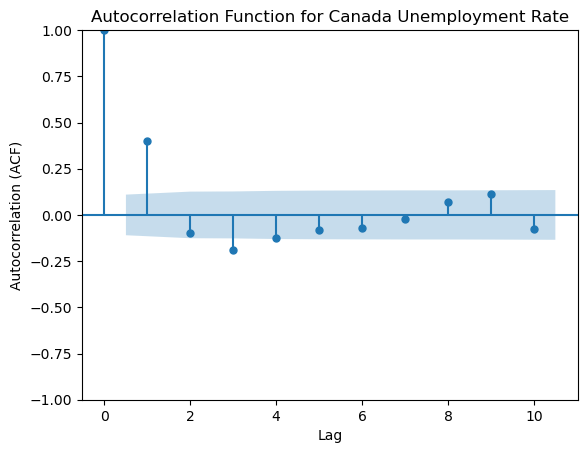

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['UNEMP_CAN'], lags=10)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation (ACF)')
plt.title('Autocorrelation Function for Canada Unemployment Rate')
plt.show()

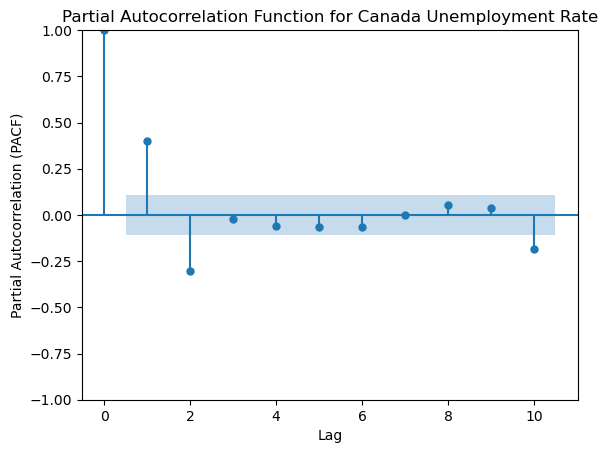

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['UNEMP_CAN'], lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation (PACF)')
plt.title('Partial Autocorrelation Function for Canada Unemployment Rate')
plt.show()

from the above 2 plots, I proposed 3 potential baseline models:

* AR(1) model
* AR(2) model
* ARMA(2,1) model

In [8]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df['UNEMP_CAN'], order=(1, 0, 0))
results = arima.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              UNEMP_CAN   No. Observations:                  318
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -137.045
Date:                Tue, 14 May 2024   AIC                            280.091
Time:                        14:32:12   BIC                            291.377
Sample:                             0   HQIC                           284.598
                                - 318                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0123      0.048     -0.255      0.798      -0.107       0.082
ar.L1          0.3971      0.014     27.685      0.000       0.369       0.425
sigma2         0.1385      0.003     49.583      0.0

In [9]:
aic100 = results.aic
bic100 = results.bic

In [10]:
arima = ARIMA(df['UNEMP_CAN'], order=(2, 0, 0))
results = arima.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              UNEMP_CAN   No. Observations:                  318
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -121.747
Date:                Tue, 14 May 2024   AIC                            251.495
Time:                        14:32:12   BIC                            266.543
Sample:                             0   HQIC                           257.505
                                - 318                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0125      0.036     -0.351      0.726      -0.082       0.057
ar.L1          0.5177      0.022     23.815      0.000       0.475       0.560
ar.L2         -0.3021      0.041     -7.350      0.0

In [11]:
aic200 = results.aic
bic200 = results.bic

In [12]:
arima = ARIMA(df['UNEMP_CAN'], order=(2, 0, 1))
results = arima.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              UNEMP_CAN   No. Observations:                  318
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -121.592
Date:                Tue, 14 May 2024   AIC                            253.184
Time:                        14:32:13   BIC                            271.995
Sample:                             0   HQIC                           260.697
                                - 318                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0126      0.035     -0.360      0.719      -0.081       0.056
ar.L1          0.6488      0.205      3.166      0.002       0.247       1.050
ar.L2         -0.3529      0.089     -3.980      0.0

In [13]:
aic201 = results.aic
bic201 = results.bic

In [14]:
aic = pd.DataFrame([aic100,aic200,aic201],
                   index = ['AR(1)','AR(2)','ARMA(2,1)'],
                   columns = ['AIC'])
bic = pd.DataFrame([bic100,bic200,bic201],
                   index = ['AR(1)','AR(2)','ARMA(2,1)'],
                   columns = ['BIC'])

In [15]:
diagnosis = pd.concat([aic, bic], axis=1)

diagnosis

,AIC,BIC
AR(1),280.090605,291.376759
AR(2),251.494514,266.542719
"ARMA(2,1)",253.184290,271.994547


#### Since AR(2) has the lowest AIC and BIC, I decided to use AR(2) model as the baseline model.

### 3. Pesudo-out-of-sample forecast using AR(2) model

In [16]:
# Fit ARIMA(2,0,0) model to the entire series
model = ARIMA(df['UNEMP_CAN'], order=(2, 0, 0)) #.iloc[:311]
results = model.fit()

# Make in-sample predictions for the entire series
predictions = results.get_prediction(start=1, dynamic=False)

# Extract the predicted values and confidence intervals
predicted_mean = predictions.predicted_mean

# Add the predicted values as a new column in the DataFrame
df['UNEMP_CAN_predicted_arma2'] = predicted_mean

# Print the DataFrame with the added column
df


,Date,t,UNEMP_CAN,GDP_new,BSI_new,GPI_new,SPI_new,IP_new,NDM_new,DM_new,...,IPPI_ENER_CAN,IPPI_WOOD_CAN,IPPI_METAL_CAN,IPPI_MOTOR_CAN,IPPI_MACH_CAN,WTISPLC,TSX_HI,TSX_LO,TSX_CLO,UNEMP_CAN_predicted_arma2
0,Feb-97,1,0.0,0.006273,0.007456,0.008982,0.004994,0.010951,0.013410,0.010017,...,-0.027536,0.004008,0.000000,0.003284,0.003839,-0.125110,0.018774,0.031989,0.007868,NaN
1,Mar-97,2,-0.2,-0.000103,-0.000210,-0.004557,0.002076,-0.006017,-0.014424,-0.006023,...,-0.054772,-0.010050,0.004874,0.007621,0.002551,-0.056497,0.013846,-0.042889,-0.051247,-0.007533
2,Apr-97,3,0.1,0.006749,0.008400,0.013052,0.003724,0.013689,0.009079,0.020985,...,-0.029934,0.029853,0.000000,0.017205,0.003814,-0.062413,-0.060286,-0.026262,0.021378,-0.113358
3,May-97,4,0.0,0.003541,0.004212,0.003167,0.003745,0.001617,0.002257,0.014521,...,0.005510,-0.017805,0.000000,-0.009641,0.000000,0.054761,0.082580,0.054234,0.065643,0.102396
4,Jun-97,5,-0.3,0.001903,0.001638,-0.004255,0.004897,-0.008476,-0.000224,-0.012633,...,-0.016621,-0.018127,0.000000,0.000000,0.000000,-0.083048,0.010101,0.067244,0.008677,-0.040023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Mar-23,314,0.0,0.000878,0.000561,0.002631,0.000177,0.005330,0.010996,-0.008463,...,-0.034046,-0.023530,-0.021277,0.008126,0.009438,-0.047307,-0.008552,-0.040916,-0.006017,-0.009808
314,Apr-23,315,0.0,-0.000770,0.000041,-0.000264,-0.000972,0.001206,-0.009389,-0.003116,...,-0.027800,-0.030623,0.002863,-0.004507,0.000000,0.080840,0.005406,0.039496,0.026349,-0.009808
315,May-23,316,0.2,0.001491,0.000228,-0.006402,0.004636,-0.003853,0.020287,0.021763,...,-0.054108,0.006525,0.002855,0.004507,0.006809,-0.104312,-0.003779,-0.029566,-0.052951,-0.009808
316,Jun-23,317,0.2,-0.001976,-0.002904,-0.004428,-0.001007,-0.001679,-0.004924,-0.003095,...,0.017851,-0.008983,-0.009309,-0.004507,-0.006809,-0.018755,-0.022557,-0.007900,0.029355,0.093741


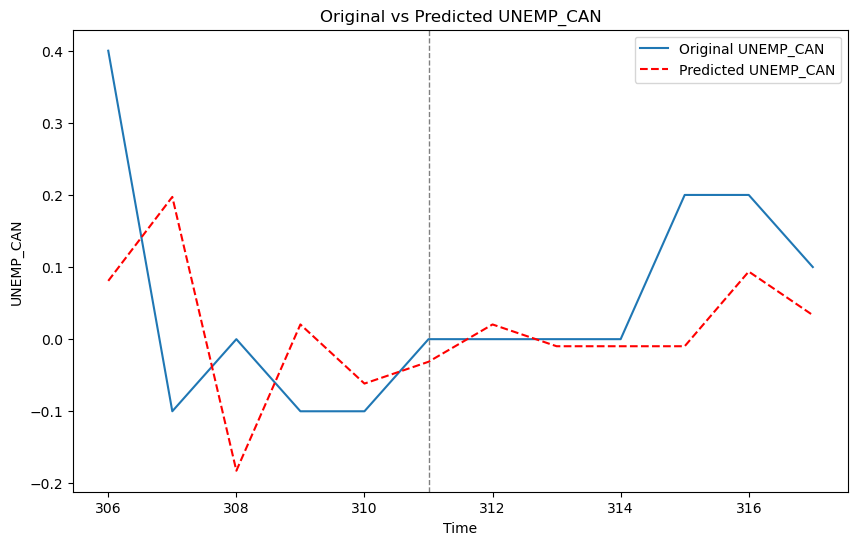

In [17]:
# Plotting the pseudo out-of-sample forecast
plt.figure(figsize=(10, 6))
plt.plot(df['UNEMP_CAN'].iloc[-12:], label='Original UNEMP_CAN')
plt.plot(df['UNEMP_CAN_predicted_arma2'].iloc[-12:], color='red', linestyle='--', label='Predicted UNEMP_CAN')
plt.axvline(x=311, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Time')
plt.ylabel('UNEMP_CAN')
plt.title('Original vs Predicted UNEMP_CAN')
plt.legend()
plt.show()


In [18]:
df['se_arma2'] = df['UNEMP_CAN'] - df['UNEMP_CAN_predicted_arma2']

In [19]:
df['sfe_arma2'] = df['se_arma2'] ** 2

In [20]:
mse_arma2 = df['sfe_arma2'].sum() / 318
mse_arma2

0.12577851555203357

### 4. Pesudo-out-of-sample forecast using Markov-switch Autoregressive Model (MSAR(2)) 

In [21]:
model = sm.tsa.MarkovAutoregression(df['UNEMP_CAN'], k_regimes=2, order=2)
results = model.fit()

print(results.summary())

                         Markov Switching Model Results                         
Dep. Variable:                UNEMP_CAN   No. Observations:                  316
Model:             MarkovAutoregression   Log Likelihood                  17.052
Date:                  Tue, 14 May 2024   AIC                            -16.103
Time:                          14:32:17   BIC                             17.698
Sample:                               0   HQIC                            -2.600
                                  - 316                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.012     -2.706      0.007      -0.055      -0.009
ar.L1          0.2198      0.040    

In [22]:
# Fit the MSAR(2) model to the 'UNEMP_CAN' variable
model = sm.tsa.MarkovAutoregression(df['UNEMP_CAN'], k_regimes=2, order=2)
results = model.fit()

# Make in-sample predictions for the entire series
predictions = results.predict(start=1)

# Add the predicted values as a new column in the DataFrame
df['UNEMP_CAN_predicted_msar2'] = predictions

# Print the DataFrame with the added column
df


,Date,t,UNEMP_CAN,GDP_new,BSI_new,GPI_new,SPI_new,IP_new,NDM_new,DM_new,...,IPPI_MOTOR_CAN,IPPI_MACH_CAN,WTISPLC,TSX_HI,TSX_LO,TSX_CLO,UNEMP_CAN_predicted_arma2,se_arma2,sfe_arma2,UNEMP_CAN_predicted_msar2
0,Feb-97,1,0.0,0.006273,0.007456,0.008982,0.004994,0.010951,0.013410,0.010017,...,0.003284,0.003839,-0.125110,0.018774,0.031989,0.007868,NaN,NaN,NaN,NaN
1,Mar-97,2,-0.2,-0.000103,-0.000210,-0.004557,0.002076,-0.006017,-0.014424,-0.006023,...,0.007621,0.002551,-0.056497,0.013846,-0.042889,-0.051247,-0.007533,-0.192467,0.037044,NaN
2,Apr-97,3,0.1,0.006749,0.008400,0.013052,0.003724,0.013689,0.009079,0.020985,...,0.017205,0.003814,-0.062413,-0.060286,-0.026262,0.021378,-0.113358,0.213358,0.045522,NaN
3,May-97,4,0.0,0.003541,0.004212,0.003167,0.003745,0.001617,0.002257,0.014521,...,-0.009641,0.000000,0.054761,0.082580,0.054234,0.065643,0.102396,-0.102396,0.010485,0.040908
4,Jun-97,5,-0.3,0.001903,0.001638,-0.004255,0.004897,-0.008476,-0.000224,-0.012633,...,0.000000,0.000000,-0.083048,0.010101,0.067244,0.008677,-0.040023,-0.259977,0.067588,-0.058440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Mar-23,314,0.0,0.000878,0.000561,0.002631,0.000177,0.005330,0.010996,-0.008463,...,0.008126,0.009438,-0.047307,-0.008552,-0.040916,-0.006017,-0.009808,0.009808,0.000096,-0.033023
314,Apr-23,315,0.0,-0.000770,0.000041,-0.000264,-0.000972,0.001206,-0.009389,-0.003116,...,-0.004507,0.000000,0.080840,0.005406,0.039496,0.026349,-0.009808,0.009808,0.000096,-0.033073
315,May-23,316,0.2,0.001491,0.000228,-0.006402,0.004636,-0.003853,0.020287,0.021763,...,0.004507,0.006809,-0.104312,-0.003779,-0.029566,-0.052951,-0.009808,0.209808,0.044020,-0.032632
316,Jun-23,317,0.2,-0.001976,-0.002904,-0.004428,-0.001007,-0.001679,-0.004924,-0.003095,...,-0.004507,-0.006809,-0.018755,-0.022557,-0.007900,0.029355,0.093741,0.106259,0.011291,0.010783


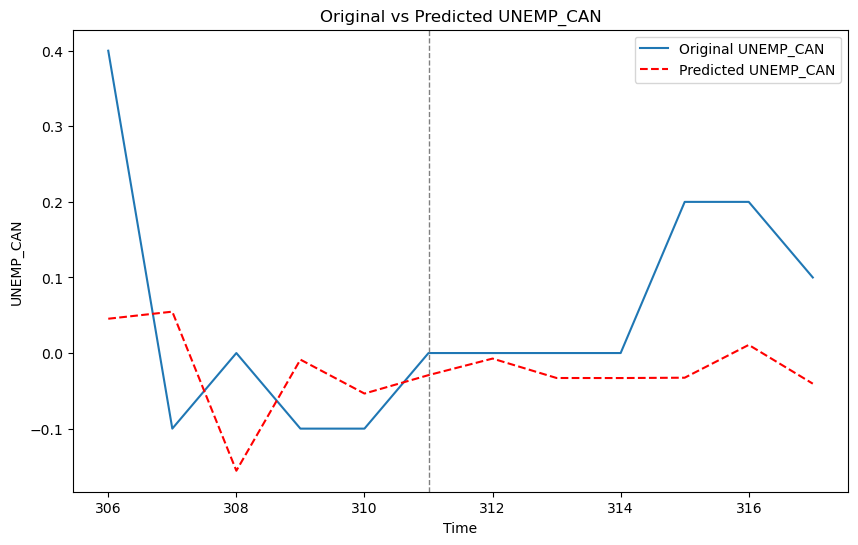

In [23]:
# Plotting the pseudo out-of-sample forecast
plt.figure(figsize=(10, 6))
plt.plot(df['UNEMP_CAN'].iloc[-12:], label='Original UNEMP_CAN')
plt.plot(df['UNEMP_CAN_predicted_msar2'].iloc[-12:], color='red', linestyle='--', label='Predicted UNEMP_CAN')
plt.axvline(x=311, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Time')
plt.ylabel('UNEMP_CAN')
plt.title('Original vs Predicted UNEMP_CAN')
plt.legend()
plt.show()

In [24]:
df['se_msar2'] = df['UNEMP_CAN'] - df['UNEMP_CAN_predicted_msar2']
df['sfe_msar2'] = df['se_msar2'] ** 2
mse_msar2 = df['sfe_msar2'].sum() / 318
mse_msar2

0.04337437798018947

In [25]:
df

,Date,t,UNEMP_CAN,GDP_new,BSI_new,GPI_new,SPI_new,IP_new,NDM_new,DM_new,...,WTISPLC,TSX_HI,TSX_LO,TSX_CLO,UNEMP_CAN_predicted_arma2,se_arma2,sfe_arma2,UNEMP_CAN_predicted_msar2,se_msar2,sfe_msar2
0,Feb-97,1,0.0,0.006273,0.007456,0.008982,0.004994,0.010951,0.013410,0.010017,...,-0.125110,0.018774,0.031989,0.007868,NaN,NaN,NaN,NaN,NaN,NaN
1,Mar-97,2,-0.2,-0.000103,-0.000210,-0.004557,0.002076,-0.006017,-0.014424,-0.006023,...,-0.056497,0.013846,-0.042889,-0.051247,-0.007533,-0.192467,0.037044,NaN,NaN,NaN
2,Apr-97,3,0.1,0.006749,0.008400,0.013052,0.003724,0.013689,0.009079,0.020985,...,-0.062413,-0.060286,-0.026262,0.021378,-0.113358,0.213358,0.045522,NaN,NaN,NaN
3,May-97,4,0.0,0.003541,0.004212,0.003167,0.003745,0.001617,0.002257,0.014521,...,0.054761,0.082580,0.054234,0.065643,0.102396,-0.102396,0.010485,0.040908,-0.040908,0.001673
4,Jun-97,5,-0.3,0.001903,0.001638,-0.004255,0.004897,-0.008476,-0.000224,-0.012633,...,-0.083048,0.010101,0.067244,0.008677,-0.040023,-0.259977,0.067588,-0.058440,-0.241560,0.058351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Mar-23,314,0.0,0.000878,0.000561,0.002631,0.000177,0.005330,0.010996,-0.008463,...,-0.047307,-0.008552,-0.040916,-0.006017,-0.009808,0.009808,0.000096,-0.033023,0.033023,0.001091
314,Apr-23,315,0.0,-0.000770,0.000041,-0.000264,-0.000972,0.001206,-0.009389,-0.003116,...,0.080840,0.005406,0.039496,0.026349,-0.009808,0.009808,0.000096,-0.033073,0.033073,0.001094
315,May-23,316,0.2,0.001491,0.000228,-0.006402,0.004636,-0.003853,0.020287,0.021763,...,-0.104312,-0.003779,-0.029566,-0.052951,-0.009808,0.209808,0.044020,-0.032632,0.232632,0.054118
316,Jun-23,317,0.2,-0.001976,-0.002904,-0.004428,-0.001007,-0.001679,-0.004924,-0.003095,...,-0.018755,-0.022557,-0.007900,0.029355,0.093741,0.106259,0.011291,0.010783,0.189217,0.035803


### 5. Forecast using LASSO Linear Regression 

In [26]:
df = pd.read_csv("df.csv")

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

df.drop(['Date', 't'], axis=1, inplace=True)

np.random.seed(42)

X = df.drop("UNEMP_CAN",axis = 1)
y = df['UNEMP_CAN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = Lasso()  
model.fit(X_train, y_train);

In [28]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse_lasso = mean_squared_error(y_test, y_pred)

# Print the mean squared error
mse_lasso

0.30847328990632183

### 6. Forecast Evaluation 

In this section, I used the mean-squared error (MSE) as the evaluation method. It is a commonly used benchmark for comparing the effectiveness of the forecasting model. The smaller the MSE is, the better the forecasting model is.

In [29]:
evaluation = pd.DataFrame([mse_arma2,mse_msar2,mse_lasso],
                          index = ['ARIMA(2,0,0)','MSAR(2)','LASSO Linear'],
                          columns = ['Mean Squared Error (MSE)'])

evaluation

,Mean Squared Error (MSE)
"ARIMA(2,0,0)",0.125779
MSAR(2),0.043374
LASSO Linear,0.308473


Since the MSAR(2) has the lowest MSE, I conclude that among all the models studied in this project, MSAR(2) is the best model for forecasting Canada unemployment rate. 